In [19]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk as nlp
import re
import unicodedata
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [20]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")
df_fake.head()
df_true.head()
#As seen by the format of these files, each row has a title of the article, text from the article, a subject, and a date. We will filter out everything but the title in order to train our model.

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [21]:
#Here we drop the columns of the dataset which are not important to us, and combine the datasets.
df_true["text"] = df_true["text"].replace("(Reuters)","",regex=True)
df_fake["target"] = 0
df_true["target"] = 1
df_fake = df_fake.drop(["title","subject","date"],axis = 1)
df_true = df_true.drop(["title","subject","date"],axis = 1)
df = pd.concat([df_fake,df_true],axis = 0)
#shuffling the dataframe so that the model does not catch patterns which are incorrect.
df = df.sample(frac=1)
df.reset_index(inplace=True)
df.drop(["index"], axis = 1, inplace = True)

In [23]:
#processing the text and normalizing it
def wordopt(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    return text


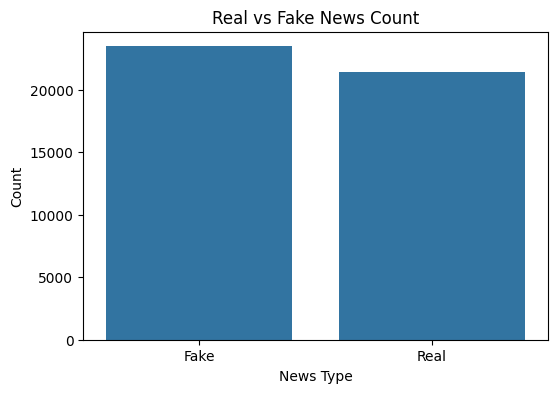

In [24]:
df["text"] = df["text"].apply(wordopt)
#class distribution of fake vs real news
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Real vs Fake News Count')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

In [25]:
#Analysis of news type csv files: There is a much larger amount of fake news headlines to real news headlines. This could create conflicts with our model as it is being trained on datasets with many more fake news headlines to real news headlines.

In [26]:
#splitting datasets into training
X = df["text"]
Y = df["target"]
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.35)

#Converting text to vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
analyze = vectorization.build_analyzer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(x_test)

#Building logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xv_train,Y_train)
print("The Accuracy of the Logistic Regression Model is {}".format(lr.score(xv_test,y_test)))
print(classification_report(y_test,lr.predict(xv_test)))

The Accuracy of the Logistic Regression Model is 0.977728285077951
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8118
           1       0.97      0.98      0.98      7597

    accuracy                           0.98     15715
   macro avg       0.98      0.98      0.98     15715
weighted avg       0.98      0.98      0.98     15715



In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xv_train,Y_train)
print("The Accuracy of the Decision Tree Classifier Model is {}".format(dtc.score(xv_test,y_test)))
print(classification_report(y_test,dtc.predict(xv_test)))

#The logistic regression model has a much better accuracy rate than the Decision tree model. We will use the logistic regression model over the decision tree classifier model.

The Accuracy of the Decision Tree Classifier Model is 0.9468024180719058
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8118
           1       0.96      0.93      0.94      7597

    accuracy                           0.95     15715
   macro avg       0.95      0.95      0.95     15715
weighted avg       0.95      0.95      0.95     15715



In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gclf = GradientBoostingClassifier()
gclf.fit(xv_train,Y_train)
print("The Accuracy of the Gradient Boosting Classifier Model is {}".format(gclf.score(xv_test,y_test)))
print(classification_report(y_test,gclf.predict(xv_test)))

The Accuracy of the Gradient Boosting Classifier Model is 0.967674196627426
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      8118
           1       0.96      0.97      0.97      7597

    accuracy                           0.97     15715
   macro avg       0.97      0.97      0.97     15715
weighted avg       0.97      0.97      0.97     15715



In [29]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(xv_train,Y_train)
print("The Accuracy of the Random Forest Classifier Model is {}".format(rclf.score(xv_test,y_test)))
print(classification_report(y_test,rclf.predict(xv_test)))

#after looking at each model, we can see that the model with the best accuracy is the Logistic Regression Model. We should use this one in testing real vs fake news headlines.

The Accuracy of the Random Forest Classifier Model is 0.9776646516067451
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8118
           1       0.98      0.98      0.98      7597

    accuracy                           0.98     15715
   macro avg       0.98      0.98      0.98     15715
weighted avg       0.98      0.98      0.98     15715



In [44]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = lr.predict(new_xv_test)
    pred_DT = dtc.predict(new_xv_test)
    pred_GBC = gclf.predict(new_xv_test)
    pred_RFC = rclf.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [45]:
test_cases = [
    #1: real 
    "SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of steady growth triggered by a flurry of massive government contracts, OAS was ensnared in Operation Car Wash which unearthed an illegal contracting ring between state firms and builders. The ensuing scandal helped topple former Brazilian President Dilma Rousseff last year. Trained as an engineer, Mata Pires founded OAS with two colleagues in 1976 to do sub-contracting work for larger rival Odebrecht SA - the biggest of the builders involved in the probe.  Before the scandal, Forbes magazine estimated Mata Pires  fortune at $1.6 billion. He dropped off the magazine s billionaire list in 2015, months after OAS sought bankruptcy protection after the Car Wash scandal. While Mata Pires was never accused of wrongdoing in the investigations, creditors demanded he and his family stay away from the builder s day-to-day operations, people directly involved in the negotiations told Reuters at the time. He is survived by his wife and his two sons. ",
    #2: fake
    "Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, and CBS. Yet, these corporations function under many different brands, such as FOX, ABC, CNN, Comcast, Wall Street Journal, etc, giving people the perception of choice   As Tavistock s researchers showed, it was important that the victims of mass brainwashing not be aware that their environment was being controlled; there should thus be a vast number of sources for information, whose messages could be varied slightly, so as to mask the sense of external control. ~ Specialist of mass brainwashing, L. WolfeNew Brainwashing Tactic Called AstroturfWith alternative media on the rise, the propaganda machine continues to expand. Below is a video of Sharyl Attkisson, investigative reporter with CBS, during which she explains how  astroturf,  or fake grassroots movements, are used to spin information not only to influence journalists but to sway public opinion. Astroturf is a perversion of grassroots. Astroturf is when political, corporate or other special interests disguise themselves and publish blogs, start facebook and twitter accounts, publish ads, letters to the editor, or simply post comments online, to try to fool you into thinking an independent or grassroots movement is speaking. ~ Sharyl Attkisson, Investigative ReporterHow do you separate fact from fiction? Sharyl Attkisson finishes her talk with some insights on how to identify signs of propaganda and astroturfing  These methods are used to give people the impression that there is widespread support for an agenda, when, in reality, one may not exist. Astroturf tactics are also used to discredit or criticize those that disagree with certain agendas, using stereotypical names such as conspiracy theorist or quack. When in fact when someone dares to reveal the truth or questions the  official  story, it should spark a deeper curiosity and encourage further scrutiny of the information.This article (Journalist Reveals Tactics Brainwashing Industry Uses to Manipulate the Public) was originally created and published by Waking Times and is published here under a Creative Commons license with attribution to Vic Bishop and WakingTimes.com. It may be re-posted freely with proper attribution, author bio, and this copyright statement. READ MORE MSM PROPAGANDA NEWS AT: 21st Century Wire MSM Watch Files",
    #3: real
    "BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they will,  Trump said. That comment signaled he would further increase pressure on U.S. partners who have already been jolted by his repeated demands to step up their contributions to NATO and his description of the alliance as  obsolete  - even though, since taking office, he has said this is no longer the case. NATO Secretary General Jens Stoltenberg said in a statement:  NATO remains fully committed to Afghanistan and I am looking forward to discussing the way ahead with (Defense) Secretary (James) Mattis and our Allies and international partners.  NATO has 12,000 troops in Afghanistan, and 15 countries have pledged more, Stoltenberg said. Britain, a leading NATO member, called the U.S. commitment  very welcome .  In my call with Secretary Mattis yesterday we agreed that despite the challenges, we have to stay the course in Afghanistan to help build up its fragile democracy and reduce the terrorist threat to the West,  Defence Secretary Michael Fallon said. Germany, which has borne the brunt of Trump s criticism over  the scale of its defense spending, also welcomed the new U.S. plan.  Our continued commitment is necessary on the path to stabilizing the country,  a government spokeswoman said. In June, European allies had already pledged more troops but had not given details on numbers, waiting for the Trump administration to outline its strategy for the region.Nearly 16 years after the U.S.-led invasion - a response to the Sept. 11 attacks which were planned by al Qaeda leader Osama bin Laden from Afghanistan - the country is still struggling with weak central government and a Taliban insurgency. Trump said he shared the frustration of the American people who were  weary of war without victory , but a hasty withdrawal would create a vacuum for groups like Islamic State and al Qaeda to fill."
]

for article in test_cases:
    manual_testing(article)




LR Prediction: Not Fake News 
DT Prediction: Not Fake News 
GBC Prediction: Fake News 
RFC Prediction: Not Fake News


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


LR Prediction: Not Fake News 
DT Prediction: Not Fake News 
GBC Prediction: Not Fake News 
RFC Prediction: Not Fake News


In [59]:
#Scrape article URLs from CNN front page
def get_article_links(base_url="https://www.cnn.com"):
    response = requests.get(base_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    links = []

    for a_tag in soup.find_all('a', href=True):
        href = a_tag['href']
        full_link = "https://www.cnn.com" + href
        if full_link not in links:
            links.append(full_link)
    
    return list(set(links))[:10]  # Limit to 10 articles for testing

#Scrape article text from a CNN article page
def get_article_text(article_url):
    try:
        response = requests.get(article_url)
        soup = BeautifulSoup(response.content, 'html.parser')
        paragraphs = soup.find_all('p')
        article_text = " ".join([p.get_text() for p in paragraphs])
        return article_text
    except:
        return ""

# Classify articles 
def classify_scraped_articles():
    article_links = get_article_links()
    print(f"\nScraping {len(article_links)} CNN articles...\n")

    article_texts = []
    valid_links = []

    for link in article_links:
        text = get_article_text(link)
        if len(text.split()) > 50:  # Only classify if article has enough content
            article_texts.append(text)
            valid_links.append(link)

    processed = [wordopt(t) for t in article_texts]
    df_test = pd.DataFrame({'text': processed})
    transformed = vectorization.transform(df_test["text"])

    preds_lr = lr.predict(transformed)
    preds_dt = dtc.predict(transformed)
    preds_gbc = gclf.predict(transformed)
    preds_rfc = rclf.predict(transformed)

    for i in range(len(valid_links)):
        print(f" Article Link: {valid_links[i]}")
        print(f"Logistic Regression: {output_lable(preds_lr[i])}")
        print(f"Decision Tree:       {output_lable(preds_dt[i])}")
        print(f"Gradient Boosting:   {output_lable(preds_gbc[i])}")
        print(f"Random Forest:       {output_lable(preds_rfc[i])}")
classify_scraped_articles()


Scraping 10 CNN articles...

 ARTICLE LINK: https://www.cnn.com/2025/05/05/science/uturuncu-zombie-volcano-erupt
 - Logistic Regression: Fake News
 - Decision Tree:       Not Fake News
 - Gradient Boosting:   Not Fake News
 - Random Forest:       Fake News
 ARTICLE LINK: https://www.cnn.com/2025/04/22/world/pope-francis-successor-frontrunners-intl-dg
 - Logistic Regression: Fake News
 - Decision Tree:       Not Fake News
 - Gradient Boosting:   Fake News
 - Random Forest:       Not Fake News


In [ ]:
#distribution of text lengths by class (real vs fake)
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='text_length', hue='target', bins=50, kde=True)
plt.title('Distribution of Text Lengths by Class')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.legend(['Fake', 'Real'])
plt.show()

from wordcloud import WordCloud

# Combine all words by class
real_words = ' '.join(df[df['target'] == 1]['text'])
fake_words = ' '.join(df[df['target'] == 0]['text'])

# WordClouds
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_words)
wordcloud_fake = WordCloud(width=800, height=400, background_color='black', colormap='Set2').generate(fake_words)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Real News WordCloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Fake News WordCloud')
plt.axis('off')

plt.tight_layout()
plt.show()

#Top N words by frequency
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

top_words = get_top_n_words(df['text'], 15)
top_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_df)
plt.title('Top 15 Most Frequent Words')
plt.show()


Prediction: Fake News
Probability it's real: 0.3252
Probability it's fake: 0.6748

Top words indicating REAL news:
via: -9.2078
us: -7.0163
this: -6.8242
that: -5.2072
mr: -5.0396
com: -4.8488
read: -4.8246
just: -4.6745
image: -4.5829
gop: -4.4867

Top words indicating FAKE news:
said: 20.0807
on: 10.9687
washington: 7.4959
in: 5.5355
republican: 5.0384
wednesday: 5.0322
told: 4.9388
thursday: 4.7515
tuesday: 4.6041
ly: 4.5905


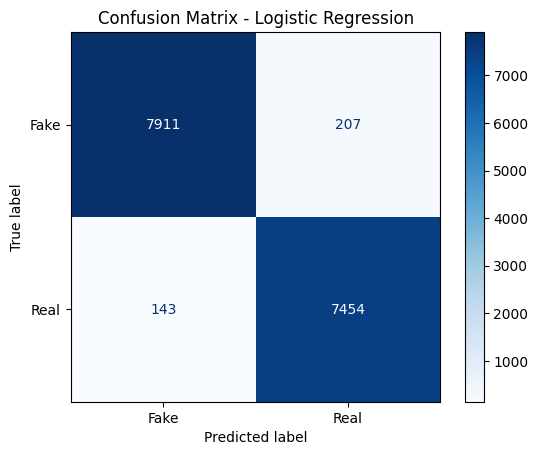


--- False Negatives (Real predicted as Fake) ---

longview  texas      looking for a way to help relieve stress in a heated political season  a texas golf course owner has given patrons the chance to whack their balls at large posters of the leading presidential candidates affixed to hay bales  in the republican stronghold of longview  where alpine target golf center is located about  miles east of dallas  democrat hillary clinton has been the overwhelming target for patrons  golf balls   hillary clinton is taking it a lot on the chin   owner m
------------------------------------------------------------

stockholm      some listeners to commercial radio station mix megapol in sweden heard  minutes of an islamic state propaganda song on friday after hackers took over the station s frequency  the station s owners said  mix megapol is one of sweden s biggest radio stations with around   million listeners daily  although the problem affected only listeners in the southern swedish city of

In [34]:
# Diagnostic script for Fake News Detection
# 1. CONFIDENCE SCORES
def show_prediction_confidence(news):
    processed_text = wordopt(news)
    transformed_text = vectorization.transform([processed_text])
    probs = lr.predict_proba(transformed_text)
    print(f"\nPrediction: {output_lable(lr.predict(transformed_text)[0])}")
    print(f"Probability it's real: {probs[0][1]:.4f}")
    print(f"Probability it's fake: {probs[0][0]:.4f}")

# 2. FEATURE IMPORTANCE
def print_top_features():
    feature_names = vectorization.get_feature_names_out()
    coefficients = lr.coef_[0]
    top_fake_idx = np.argsort(coefficients)[-10:]
    top_real_idx = np.argsort(coefficients)[:10]

    print("\nTop words indicating REAL news:")
    for i in top_real_idx:
        print(f"{feature_names[i]}: {coefficients[i]:.4f}")

    print("\nTop words indicating FAKE news:")
    for i in reversed(top_fake_idx):
        print(f"{feature_names[i]}: {coefficients[i]:.4f}")

# 3. CONFUSION MATRIX
def plot_confusion_matrix():
    y_pred = lr.predict(xv_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix - Logistic Regression")
    plt.show()

# 4. MISCLASSIFIED EXAMPLES
def show_misclassified_examples():
    y_pred = lr.predict(xv_test)
    false_negatives = x_test[(y_test == 1) & (y_pred == 0)]  # Real predicted as Fake
    false_positives = x_test[(y_test == 0) & (y_pred == 1)]  # Fake predicted as Real

    print("\n--- False Negatives (Real predicted as Fake) ---")
    for article in false_negatives.sample(3, random_state=1):
        print(f"\n{article[:500]}\n{'-'*60}")

    print("\n--- False Positives (Fake predicted as Real) ---")
    for article in false_positives.sample(3, random_state=1):
        print(f"\n{article[:500]}\n{'-'*60}")

# 5. FULL DIAGNOSTIC FUNCTION
def run_full_diagnostics(news_input):
    show_prediction_confidence(news_input)
    print_top_features()
    plot_confusion_matrix()
    show_misclassified_examples()

# Example usage:
run_full_diagnostics("NASA confirms discovery of water on the sunlit surface of the Moon")
